In [10]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import adjusted_rand_score, rand_score
from sklearn.cluster import  OPTICS, AgglomerativeClustering
from torchvision.datasets import MNIST
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Скачаем датасет и выведем его размеры.

In [2]:
mnist_train_dataset = MNIST('./data', train=True, download=True)
mnist_test_dataset = MNIST('./data', train=False, download=False)
print(len(mnist_train_dataset), len(mnist_test_dataset))

60000 10000


Отрисуем первые 10 сэмплов датасета.

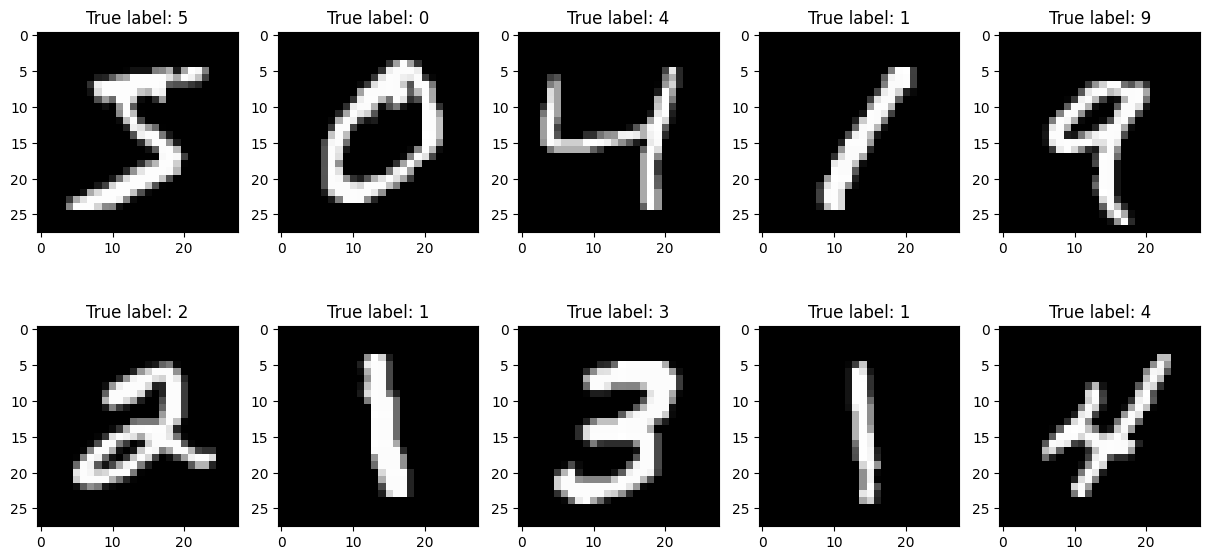

In [3]:
N_IMAGES = 10
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(15, 7))
for i in range(N_IMAGES):
    axs[int(i / 5)][int(i % 5)].imshow(mnist_train_dataset[i][0], cmap='gray')
    axs[int(i / 5)][int(i % 5)].set_title(f'True label: {str(mnist_train_dataset[i][1])}')

In [4]:
train_images = np.array([np.array(item[0]).flatten() for item in mnist_train_dataset])
train_labels = np.array([item[1] for item in mnist_train_dataset])
print(len(train_images), len(train_labels))

60000 60000


In [5]:
test_images = np.array([np.array(item[0]).flatten() for item in mnist_test_dataset])
test_labels = np.array([item[1] for item in mnist_test_dataset])
print(len(test_images), len(test_labels))

10000 10000


In [13]:
clf1 = KNeighborsClassifier(n_neighbors=5)
clf1.fit(train_images, train_labels)
pred_labels = clf1.predict(test_images)
accuracy_score(pred_labels, test_labels, normalize=False)

0.9688

Запускаем процесс работы алгоритма.

In [6]:
ARI_train = []
ARI_test = []
for i in [(k + 1) * 0.1 for k in reversed(range(5))]:

    train_images_subset = train_images[:int(len(mnist_train_dataset) * i)]
    train_labels_subset = train_labels[:int(len(mnist_train_dataset) * i)]

    cls = AgglomerativeClustering(n_clusters=10).fit(train_images_subset)
    train_ARI = adjusted_rand_score(train_labels_subset, cls.labels_)
    print(f'train_ARI: {train_ARI}')

    ARI_train.append(train_ARI)

    clf = KNeighborsClassifier()
    clf.fit(train_images_subset, cls.labels_)
    y_test_pred = clf.predict(test_images)
    test_ARI = adjusted_rand_score(test_labels, y_test_pred)
    print(f'test_ARI: {test_ARI}')

    ARI_test.append(test_ARI)

train_ARI: 0.5166572218854658
test_ARI: 0.5276008476288322
train_ARI: 0.5591566425868857
test_ARI: 0.5750037637052827
train_ARI: 0.5746405290319497
test_ARI: 0.5825924242572456
train_ARI: 0.5258404921849106
test_ARI: 0.5380199453699682
train_ARI: 0.42978537986342424
test_ARI: 0.44659083335941807


Полученные результаты:

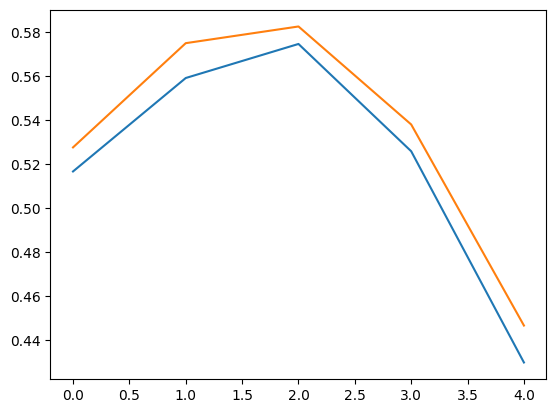

In [7]:
plt.plot(ARI_train)
plt.plot(ARI_test)

Если честно, непонятно как интерпретировать такие результаты. Датасет с каждой итерацией уменьшался, начиная с 0.5 датасета до 0.1 датасета. Логично предположить, что с уменьшением датасета ARI и на test, и на train должен падать, но этого почему-то не происходит. Сначала наблюдается видимый прирост показателя ARI, а затем уже идёт его спад. Вообще, алгоритм AgglomerativeClustering очень затратный для таких данных, всё-таки представлять картинку, как точку в n-мерном пространстве - не лучший способ классификации и кластеризации. На моём устройстве просто не хватало ОЗУ для того, чтобы выполнить алгоритм хотя бы на 60% датасета, а это всего лишь MNIST. К тому же, sklearn не использует акселерацию с помощью GPU, из-за чего работа алгоритма занимает просто космическое количество времени. Если у Вас будет время, объясните, пожалуйста, почему результаты получились именно такими.